Data is from: https://covidtracking.com/api

In [18]:
import pandas as pd
import json
from pandas.io.json import json_normalize

import numpy as np 

py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

# JSON as string

**NOTE: Certain columns have been deprecated**


Data Legend: 

    state - State or territory postal code abbreviation.
    positive - Total cumulative positive test results.
    positiveScore - +1 for reporting positives reliably.
    negative - Total cumulative negative test results.
    negativeScore - +1 for reporting negatives sometimes.
    negativeRegularScore - +1 for reporting negatives reliably.
    commercialScore - +1 for reporting all commercial tests.
    score - Total reporting quality score.
    grade - Letter grade based on score.
    totalTestResults - Calculated value (positive + negative) of total test results.
    hospitalized - Total cumulative number of people hospitalized.
    death - Total cumulative number of people that have died.
    dateModified - ISO 8601 date of the time the data was last updated by the state.
    dateChecked - ISO 8601 date of the time we last visited their website
    hash - A unique ID changed every time the data updates.
    total - DEPRECATED Will be removed in the future. (positive + negative + pending). Pending has been an unstable value  and should not count in any totals.

In [11]:
null = None
data = {'current' : [{"state":"AK","positive":143,"positiveScore":1,"negativeScore":1,"negativeRegularScore":1,"commercialScore":1,"grade":"A","score":4,"negative":4879,"pending":null,"hospitalized":9,"death":3,"total":5022,"lastUpdateEt":"4/01 19:00","checkTimeEt":"4/01 22:34","totalTestResults":5022,"fips":"02","dateModified":"2020-04-01T23:00:00Z","dateChecked":"2020-04-02T02:34:00Z","notes":"Please stop using the \"total\" field. Use \"totalTestResults\" instead.","hash":"baf5608924f257e809bac324daffa0ecaa742f31"},{"state":"AL","positive":1106,"positiveScore":1,"negativeScore":1,"negativeRegularScore":0,"commercialScore":1,"grade":"B","score":3,"negative":6697,"pending":null,"hospitalized":null,"death":28,"total":7803,"lastUpdateEt":"4/01 00:00","checkTimeEt":"4/01 22:35","totalTestResults":7803,"fips":"01","dateModified":"2020-04-01T04:00:00Z","dateChecked":"2020-04-02T02:35:00Z","notes":"Please stop using the \"total\" field. Use \"totalTestResults\" instead.","hash":"6d740a9ac8fb7757ed2593bf40e9b5ee913a7a3f"},{"state":"AR","positive":624,"positiveScore":1,"negativeScore":1,"negativeRegularScore":1,"commercialScore":1,"grade":"A","score":4,"negative":7836,"pending":null,"hospitalized":90,"death":10,"total":8460,"lastUpdateEt":"4/01 20:20","checkTimeEt":"4/01 23:56","totalTestResults":8460,"fips":"05","dateModified":"2020-04-02T00:20:00Z","dateChecked":"2020-04-02T03:56:00Z","notes":"Please stop using the \"total\" field. Use \"totalTestResults\" instead.","hash":"4940adc9942f4364cf19d43f40617f2490edb726"},{"state":"AZ","positive":1413,"positiveScore":1,"negativeScore":1,"negativeRegularScore":0,"commercialScore":1,"grade":"B","score":3,"negative":19645,"pending":null,"hospitalized":149,"death":29,"total":21058,"lastUpdateEt":"4/01 00:00","checkTimeEt":"4/01 22:16","totalTestResults":21058,"fips":"04","dateModified":"2020-04-01T04:00:00Z","dateChecked":"2020-04-02T02:16:00Z","notes":"Please stop using the \"total\" field. Use \"totalTestResults\" instead.","hash":"01bf26424329f52ea5802c27962a5cb55327e76c"},{"state":"CA","positive":8155,"positiveScore":1,"negativeScore":1,"negativeRegularScore":1,"commercialScore":0,"grade":"B","score":3,"negative":22883,"pending":59100,"hospitalized":1855,"death":171,"total":90138,"lastUpdateEt":"4/01 00:00","checkTimeEt":"4/01 22:34","totalTestResults":31038,"fips":"06","dateModified":"2020-04-01T04:00:00Z","dateChecked":"2020-04-02T02:34:00Z","notes":"Please stop using the \"total\" field. Use \"totalTestResults\" instead.","hash":"53c7f26a928cbd6de1c4047a7cdff563904e3ade"},{"state":"CO","positive":3342,"positiveScore":1,"negativeScore":1,"negativeRegularScore":1,"commercialScore":1,"grade":"A","score":4,"negative":15303,"pending":null,"hospitalized":620,"death":80,"total":18645,"lastUpdateEt":"4/01 00:00","checkTimeEt":"4/01 23:01","totalTestResults":18645,"fips":"08","dateModified":"2020-04-01T04:00:00Z","dateChecked":"2020-04-02T03:01:00Z","notes":"Please stop using the \"total\" field. Use \"totalTestResults\" instead.","hash":"8b37d6b5fc58f18899ff5bd12a3d6fb301fa7d06"},{"state":"CT","positive":3557,"positiveScore":1,"negativeScore":1,"negativeRegularScore":1,"commercialScore":1,"grade":"A","score":4,"negative":13043,"pending":null,"hospitalized":766,"death":85,"total":16600,"lastUpdateEt":"4/01 13:30","checkTimeEt":"4/01 16:36","totalTestResults":16600,"fips":"09","dateModified":"2020-04-01T17:30:00Z","dateChecked":"2020-04-01T20:36:00Z","notes":"Please stop using the \"total\" field. Use \"totalTestResults\" instead.","hash":"1bd60bdace49ea475f54e5eb653ec703578e1b55"},{"state":"DC","positive":586,"positiveScore":1,"negativeScore":1,"negativeRegularScore":1,"commercialScore":1,"grade":"A","score":4,"negative":3262,"pending":2,"hospitalized":null,"death":11,"total":3850,"lastUpdateEt":"3/31 21:24","checkTimeEt":"4/01 14:10","totalTestResults":3848,"fips":"11","dateModified":"2020-04-01T01:24:00Z","dateChecked":"2020-04-01T18:10:00Z","notes":"Please stop using the \"total\" field. Use \"totalTestResults\" instead.","hash":"f663d280ce2780e18d56f1d93285028ea4eefd9b"},{"state":"DE","positive":368,"positiveScore":1,"negativeScore":1,"negativeRegularScore":1,"commercialScore":1,"grade":"A","score":4,"negative":4015,"pending":null,"hospitalized":57,"death":11,"total":4383,"lastUpdateEt":"4/01 12:30","checkTimeEt":"4/01 16:21","totalTestResults":4383,"fips":"10","dateModified":"2020-04-01T16:30:00Z","dateChecked":"2020-04-01T20:21:00Z","notes":"Please stop using the \"total\" field. Use \"totalTestResults\" instead.","hash":"1c8615bd94b1849477a8cb7c382cbf0e589ac2a3"},{"state":"FL","positive":7559,"positiveScore":1,"negativeScore":1,"negativeRegularScore":1,"commercialScore":1,"grade":"A","score":4,"negative":60356,"pending":1329,"hospitalized":1043,"death":97,"total":69244,"lastUpdateEt":"4/01 17:30","checkTimeEt":"4/01 22:43","totalTestResults":67915,"fips":"12","dateModified":"2020-04-01T21:30:00Z","dateChecked":"2020-04-02T02:43:00Z","notes":"Please stop using the \"total\" field. Use \"totalTestResults\" instead.","hash":"d5d70b781f03dccb6b98fefc81975323a8f79249"},{"state":"GA","positive":4748,"positiveScore":1,"negativeScore":1,"negativeRegularScore":1,"commercialScore":1,"grade":"A","score":4,"negative":15690,"pending":null,"hospitalized":1013,"death":154,"total":20438,"lastUpdateEt":"4/01 18:28","checkTimeEt":"4/01 23:14","totalTestResults":20438,"fips":"13","dateModified":"2020-04-01T22:28:00Z","dateChecked":"2020-04-02T03:14:00Z","notes":"Please stop using the \"total\" field. Use \"totalTestResults\" instead.","hash":"2ad812f025cb4866ea64f8cf584f6477bb375927"},{"state":"HI","positive":258,"positiveScore":1,"negativeScore":1,"negativeRegularScore":1,"commercialScore":1,"grade":"A","score":4,"negative":10206,"pending":18,"hospitalized":15,"death":1,"total":10482,"lastUpdateEt":"4/01 18:00","checkTimeEt":"4/01 23:18","totalTestResults":10464,"fips":"15","dateModified":"2020-04-01T22:00:00Z","dateChecked":"2020-04-02T03:18:00Z","notes":"Please stop using the \"total\" field. Use \"totalTestResults\" instead.","hash":"27ddc299539d39e2adcf8b0bc4e5e810f41f6cff"},{"state":"IA","positive":549,"positiveScore":1,"negativeScore":1,"negativeRegularScore":1,"commercialScore":1,"grade":"A","score":4,"negative":7304,"pending":null,"hospitalized":99,"death":9,"total":7853,"lastUpdateEt":"4/01 14:40","checkTimeEt":"4/01 15:12","totalTestResults":7853,"fips":"19","dateModified":"2020-04-01T18:40:00Z","dateChecked":"2020-04-01T19:12:00Z","notes":"Please stop using the \"total\" field. Use \"totalTestResults\" instead.","hash":"3cde5316c6f2213628879a8722bd6aef5229ca79"},{"state":"ID","positive":673,"positiveScore":1,"negativeScore":1,"negativeRegularScore":1,"commercialScore":1,"grade":"A","score":4,"negative":6609,"pending":null,"hospitalized":49,"death":9,"total":7282,"lastUpdateEt":"4/01 19:00","checkTimeEt":"4/01 23:31","totalTestResults":7282,"fips":"16","dateModified":"2020-04-01T23:00:00Z","dateChecked":"2020-04-02T03:31:00Z","notes":"Please stop using the \"total\" field. Use \"totalTestResults\" instead.","hash":"aac2b92c9ef9479c324e10c98d553fbad1e91f7b"},{"state":"IL","positive":6980,"positiveScore":1,"negativeScore":1,"negativeRegularScore":1,"commercialScore":1,"grade":"A","score":4,"negative":33404,"pending":null,"hospitalized":null,"death":141,"total":40384,"lastUpdateEt":"4/01 00:00","checkTimeEt":"4/01 22:22","totalTestResults":40384,"fips":"17","dateModified":"2020-04-01T04:00:00Z","dateChecked":"2020-04-02T02:22:00Z","notes":"Please stop using the \"total\" field. Use \"totalTestResults\" instead.","hash":"92898f0594a657a43a314cd9dda7ccbd09908fe7"},{"state":"IN","positive":2565,"positiveScore":1,"negativeScore":1,"negativeRegularScore":1,"commercialScore":0,"grade":"B","score":3,"negative":11810,"pending":null,"hospitalized":null,"death":65,"total":14375,"lastUpdateEt":"4/01 00:59","checkTimeEt":"4/01 15:18","totalTestResults":14375,"fips":"18","dateModified":"2020-04-01T04:59:00Z","dateChecked":"2020-04-01T19:18:00Z","notes":"Please stop using the \"total\" field. Use \"totalTestResults\" instead.","hash":"03f65ad4c449cba23bf074d5037cfb2d7d11bbce"},{"state":"KS","positive":482,"positiveScore":1,"negativeScore":1,"negativeRegularScore":1,"commercialScore":0,"grade":"B","score":3,"negative":5411,"pending":null,"hospitalized":114,"death":10,"total":5893,"lastUpdateEt":"4/01 11:00","checkTimeEt":"4/01 16:22","totalTestResults":5893,"fips":"20","dateModified":"2020-04-01T15:00:00Z","dateChecked":"2020-04-01T20:22:00Z","notes":"Please stop using the \"total\" field. Use \"totalTestResults\" instead.","hash":"cb36611dab2f5a3581d432a223eac13054247adf"},{"state":"KY","positive":680,"positiveScore":1,"negativeScore":1,"negativeRegularScore":1,"commercialScore":1,"grade":"A","score":4,"negative":7220,"pending":null,"hospitalized":null,"death":20,"total":7900,"lastUpdateEt":"4/01 17:00","checkTimeEt":"4/01 23:32","totalTestResults":7900,"fips":"21","dateModified":"2020-04-01T21:00:00Z","dateChecked":"2020-04-02T03:32:00Z","notes":"Please stop using the \"total\" field. Use \"totalTestResults\" instead.","hash":"c66e04f4d54a0186fd830d6e0480396cb66f45c9"},{"state":"LA","positive":6424,"positiveScore":1,"negativeScore":1,"negativeRegularScore":1,"commercialScore":1,"grade":"A","score":4,"negative":39352,"pending":null,"hospitalized":1498,"death":273,"total":45776,"lastUpdateEt":"4/01 13:00","checkTimeEt":"4/01 15:21","totalTestResults":45776,"fips":"22","dateModified":"2020-04-01T17:00:00Z","dateChecked":"2020-04-01T19:21:00Z","notes":"Please stop using the \"total\" field. Use \"totalTestResults\" instead.","hash":"484e23d4502617be9ec5f2a5aa82e396d622b2a1"},{"state":"MA","positive":7738,"positiveScore":1,"negativeScore":1,"negativeRegularScore":0,"commercialScore":1,"grade":"B","score":3,"negative":44000,"pending":null,"hospitalized":682,"death":122,"total":51738,"lastUpdateEt":"3/31 12:30","checkTimeEt":"4/01 16:17","totalTestResults":51738,"fips":"25","dateModified":"2020-03-31T16:30:00Z","dateChecked":"2020-04-01T20:17:00Z","notes":"Please stop using the \"total\" field. Use \"totalTestResults\" instead.","hash":"0f69110f10002f087f48393c574c95d590a9bccb"},{"state":"MD","positive":1985,"positiveScore":1,"negativeScore":1,"negativeRegularScore":1,"commercialScore":1,"grade":"A","score":4,"negative":17233,"pending":null,"hospitalized":522,"death":31,"total":19218,"lastUpdateEt":"4/01 10:00","checkTimeEt":"4/01 15:25","totalTestResults":19218,"fips":"24","dateModified":"2020-04-01T14:00:00Z","dateChecked":"2020-04-01T19:25:00Z","notes":"Please stop using the \"total\" field. Use \"totalTestResults\" instead.","hash":"47756378194ba859244cb661093c1eb3dc61bcd7"},{"state":"ME","positive":344,"positiveScore":1,"negativeScore":1,"negativeRegularScore":1,"commercialScore":1,"grade":"A","score":4,"negative":6088,"pending":null,"hospitalized":63,"death":7,"total":6432,"lastUpdateEt":"4/01 11:00","checkTimeEt":"4/01 16:16","totalTestResults":6432,"fips":"23","dateModified":"2020-04-01T15:00:00Z","dateChecked":"2020-04-01T20:16:00Z","notes":"Please stop using the \"total\" field. Use \"totalTestResults\" instead.","hash":"9dd62e521052927448ad9b1bd5c6c37c3985fe02"},{"state":"MI","positive":9334,"positiveScore":1,"negativeScore":1,"negativeRegularScore":0,"commercialScore":1,"grade":"B","score":3,"negative":11893,"pending":null,"hospitalized":null,"death":337,"total":21227,"lastUpdateEt":"4/01 11:00","checkTimeEt":"4/01 22:33","totalTestResults":21227,"fips":"26","dateModified":"2020-04-01T15:00:00Z","dateChecked":"2020-04-02T02:33:00Z","notes":"Please stop using the \"total\" field. Use \"totalTestResults\" instead.","hash":"6c91709862893698114b677646c6db166b8d477c"},{"state":"MN","positive":689,"positiveScore":1,"negativeScore":1,"negativeRegularScore":1,"commercialScore":1,"grade":"A","score":4,"negative":20502,"pending":null,"hospitalized":122,"death":17,"total":21191,"lastUpdateEt":"4/01 12:00","checkTimeEt":"4/01 15:32","totalTestResults":21191,"fips":"27","dateModified":"2020-04-01T16:00:00Z","dateChecked":"2020-04-01T19:32:00Z","notes":"Please stop using the \"total\" field. Use \"totalTestResults\" instead.","hash":"120d6854b46ca7b0bb73177e153b696cfcaaf9e4"},{"state":"MO","positive":1581,"positiveScore":1,"negativeScore":1,"negativeRegularScore":1,"commercialScore":1,"grade":"A","score":4,"negative":15846,"pending":null,"hospitalized":null,"death":18,"total":17427,"lastUpdateEt":"4/01 15:00","checkTimeEt":"4/01 22:46","totalTestResults":17427,"fips":"29","dateModified":"2020-04-01T19:00:00Z","dateChecked":"2020-04-02T02:46:00Z","notes":"Please stop using the \"total\" field. Use \"totalTestResults\" instead.","hash":"0964ae8fa867429d2f6fdd252040a72ea7b2b0ce"},{"state":"MS","positive":1073,"positiveScore":1,"negativeScore":1,"negativeRegularScore":1,"commercialScore":0,"grade":"B","score":3,"negative":3712,"pending":null,"hospitalized":332,"death":22,"total":4785,"lastUpdateEt":"3/31 19:00","checkTimeEt":"4/01 16:26","totalTestResults":4785,"fips":"28","dateModified":"2020-03-31T23:00:00Z","dateChecked":"2020-04-01T20:26:00Z","notes":"Please stop using the \"total\" field. Use \"totalTestResults\" instead.","hash":"e3173d0075089af20bba64262bd8e7ebab4e5839"},{"state":"MT","positive":217,"positiveScore":1,"negativeScore":1,"negativeRegularScore":1,"commercialScore":1,"grade":"A","score":4,"negative":4871,"pending":null,"hospitalized":19,"death":5,"total":5088,"lastUpdateEt":"4/01 18:30","checkTimeEt":"4/01 23:36","totalTestResults":5088,"fips":"30","dateModified":"2020-04-01T22:30:00Z","dateChecked":"2020-04-02T03:36:00Z","notes":"Please stop using the \"total\" field. Use \"totalTestResults\" instead.","hash":"7a8182c884843a314eca4c1c6c97ea0e76a2d078"},{"state":"NC","positive":1584,"positiveScore":1,"negativeScore":1,"negativeRegularScore":1,"commercialScore":1,"grade":"A","score":4,"negative":24659,"pending":null,"hospitalized":204,"death":10,"total":26243,"lastUpdateEt":"4/01 11:00","checkTimeEt":"4/01 15:13","totalTestResults":26243,"fips":"37","dateModified":"2020-04-01T15:00:00Z","dateChecked":"2020-04-01T19:13:00Z","notes":"Please stop using the \"total\" field. Use \"totalTestResults\" instead.","hash":"a28417c3b8000fac8905097336eb4d07e94833a9"},{"state":"ND","positive":147,"positiveScore":1,"negativeScore":1,"negativeRegularScore":1,"commercialScore":0,"grade":"B","score":3,"negative":4480,"pending":null,"hospitalized":26,"death":3,"total":4627,"lastUpdateEt":"4/01 18:02","checkTimeEt":"4/01 23:36","totalTestResults":4627,"fips":"38","dateModified":"2020-04-01T22:02:00Z","dateChecked":"2020-04-02T03:36:00Z","notes":"Please stop using the \"total\" field. Use \"totalTestResults\" instead.","hash":"6951b7cafb285acbe7a93f2d66ea70f49feda16e"},{"state":"NE","positive":214,"positiveScore":1,"negativeScore":1,"negativeRegularScore":1,"commercialScore":1,"grade":"A","score":4,"negative":3590,"pending":8,"hospitalized":null,"death":4,"total":3812,"lastUpdateEt":"4/01 00:00","checkTimeEt":"4/01 23:11","totalTestResults":3804,"fips":"31","dateModified":"2020-04-01T04:00:00Z","dateChecked":"2020-04-02T03:11:00Z","notes":"Please stop using the \"total\" field. Use \"totalTestResults\" instead.","hash":"4f18623d18873cbb73da61aae14911a5c875cbb0"},{"state":"NH","positive":415,"positiveScore":1,"negativeScore":1,"negativeRegularScore":1,"commercialScore":0,"grade":"B","score":3,"negative":6078,"pending":126,"hospitalized":59,"death":4,"total":6619,"lastUpdateEt":"4/01 09:00","checkTimeEt":"4/01 23:37","totalTestResults":6493,"fips":"33","dateModified":"2020-04-01T13:00:00Z","dateChecked":"2020-04-02T03:37:00Z","notes":"Please stop using the \"total\" field. Use \"totalTestResults\" instead.","hash":"beedd39a15931da6221548d582a7e4a8b462592d"},{"state":"NJ","positive":22255,"positiveScore":1,"negativeScore":1,"negativeRegularScore":1,"commercialScore":1,"grade":"A","score":4,"negative":30387,"pending":null,"hospitalized":null,"death":355,"total":52642,"lastUpdateEt":"4/01 13:00","checkTimeEt":"4/01 22:51","totalTestResults":52642,"fips":"34","dateModified":"2020-04-01T17:00:00Z","dateChecked":"2020-04-02T02:51:00Z","notes":"Please stop using the \"total\" field. Use \"totalTestResults\" instead.","hash":"f16bb2e3addea0ee6e6cd714baddf80ed74f880d"},{"state":"NM","positive":363,"positiveScore":1,"negativeScore":1,"negativeRegularScore":1,"commercialScore":1,"grade":"A","score":4,"negative":13648,"pending":null,"hospitalized":31,"death":6,"total":14011,"lastUpdateEt":"4/01 00:00","checkTimeEt":"4/01 23:08","totalTestResults":14011,"fips":"35","dateModified":"2020-04-01T04:00:00Z","dateChecked":"2020-04-02T03:08:00Z","notes":"Please stop using the \"total\" field. Use \"totalTestResults\" instead.","hash":"6b250429ad97c6f3f481814220f1baac90770c06"},{"state":"NV","positive":1279,"positiveScore":1,"negativeScore":1,"negativeRegularScore":1,"commercialScore":1,"grade":"A","score":4,"negative":11519,"pending":null,"hospitalized":null,"death":32,"total":12798,"lastUpdateEt":"4/01 09:30","checkTimeEt":"4/01 23:08","totalTestResults":12798,"fips":"32","dateModified":"2020-04-01T13:30:00Z","dateChecked":"2020-04-02T03:08:00Z","notes":"Please stop using the \"total\" field. Use \"totalTestResults\" instead.","hash":"546b31ae44dc9e98bb778fdde43e96287617bee3"},{"state":"NY","positive":83712,"positiveScore":1,"negativeScore":1,"negativeRegularScore":1,"commercialScore":1,"grade":"A","score":4,"negative":137168,"pending":null,"hospitalized":18368,"death":1941,"total":220880,"lastUpdateEt":"4/01 12:00","checkTimeEt":"4/01 17:02","totalTestResults":220880,"fips":"36","dateModified":"2020-04-01T16:00:00Z","dateChecked":"2020-04-01T21:02:00Z","notes":"Please stop using the \"total\" field. Use \"totalTestResults\" instead.","hash":"60187a3fd527a39c919d2e2709988cff60617213"},{"state":"OH","positive":2547,"positiveScore":1,"negativeScore":1,"negativeRegularScore":0,"commercialScore":1,"grade":"B","score":3,"negative":26992,"pending":null,"hospitalized":679,"death":65,"total":29539,"lastUpdateEt":"4/01 14:00","checkTimeEt":"4/01 15:51","totalTestResults":29539,"fips":"39","dateModified":"2020-04-01T18:00:00Z","dateChecked":"2020-04-01T19:51:00Z","notes":"Please stop using the \"total\" field. Use \"totalTestResults\" instead.","hash":"92903db3691868ba22854e48b57e622b5a2227f4"},{"state":"OK","positive":719,"positiveScore":1,"negativeScore":1,"negativeRegularScore":1,"commercialScore":0,"grade":"B","score":3,"negative":1248,"pending":null,"hospitalized":219,"death":30,"total":1967,"lastUpdateEt":"4/01 08:00","checkTimeEt":"4/01 22:28","totalTestResults":1967,"fips":"40","dateModified":"2020-04-01T12:00:00Z","dateChecked":"2020-04-02T02:28:00Z","notes":"Please stop using the \"total\" field. Use \"totalTestResults\" instead.","hash":"79ae9de30becf99e4adfeee326d9c2cd5276856a"},{"state":"OR","positive":736,"positiveScore":1,"negativeScore":1,"negativeRegularScore":1,"commercialScore":1,"grade":"A","score":4,"negative":14132,"pending":null,"hospitalized":167,"death":19,"total":14868,"lastUpdateEt":"4/01 11:00","checkTimeEt":"4/01 23:05","totalTestResults":14868,"fips":"41","dateModified":"2020-04-01T15:00:00Z","dateChecked":"2020-04-02T03:05:00Z","notes":"Please stop using the \"total\" field. Use \"totalTestResults\" instead.","hash":"a6e1aa757cc85ef3972f1ef0452f1634424d15ee"},{"state":"PA","positive":5805,"positiveScore":1,"negativeScore":1,"negativeRegularScore":1,"commercialScore":1,"grade":"A","score":4,"negative":42427,"pending":null,"hospitalized":620,"death":74,"total":48232,"lastUpdateEt":"4/01 12:00","checkTimeEt":"4/01 15:10","totalTestResults":48232,"fips":"42","dateModified":"2020-04-01T16:00:00Z","dateChecked":"2020-04-01T19:10:00Z","notes":"Please stop using the \"total\" field. Use \"totalTestResults\" instead.","hash":"3b8f11d4a9338567c888167b2b79136926e66388"},{"state":"RI","positive":566,"positiveScore":1,"negativeScore":1,"negativeRegularScore":1,"commercialScore":0,"grade":"B","score":3,"negative":3831,"pending":null,"hospitalized":60,"death":10,"total":4397,"lastUpdateEt":"4/01 15:58","checkTimeEt":"4/01 16:13","totalTestResults":4397,"fips":"44","dateModified":"2020-04-01T19:58:00Z","dateChecked":"2020-04-01T20:13:00Z","notes":"Please stop using the \"total\" field. Use \"totalTestResults\" instead.","hash":"aa5072ab25ca699ed65fd32bc156bdd311833376"},{"state":"SC","positive":1293,"positiveScore":1,"negativeScore":1,"negativeRegularScore":1,"commercialScore":0,"grade":"B","score":3,"negative":5033,"pending":null,"hospitalized":349,"death":26,"total":6326,"lastUpdateEt":"4/01 15:55","checkTimeEt":"4/01 16:03","totalTestResults":6326,"fips":"45","dateModified":"2020-04-01T19:55:00Z","dateChecked":"2020-04-01T20:03:00Z","notes":"Please stop using the \"total\" field. Use \"totalTestResults\" instead.","hash":"d807950775ce708236cb10a0507d199dba183eef"},{"state":"SD","positive":129,"positiveScore":1,"negativeScore":1,"negativeRegularScore":1,"commercialScore":1,"grade":"A","score":4,"negative":3903,"pending":0,"hospitalized":12,"death":2,"total":4032,"lastUpdateEt":"4/01 12:30","checkTimeEt":"4/01 15:12","totalTestResults":4032,"fips":"46","dateModified":"2020-04-01T16:30:00Z","dateChecked":"2020-04-01T19:12:00Z","notes":"Please stop using the \"total\" field. Use \"totalTestResults\" instead.","hash":"3e09cd7a7c9e941c4e844f352edcb6092d129cc5"},{"state":"TN","positive":2683,"positiveScore":1,"negativeScore":1,"negativeRegularScore":1,"commercialScore":1,"grade":"A","score":4,"negative":29769,"pending":null,"hospitalized":200,"death":24,"total":32452,"lastUpdateEt":"4/01 15:00","checkTimeEt":"4/01 15:48","totalTestResults":32452,"fips":"47","dateModified":"2020-04-01T19:00:00Z","dateChecked":"2020-04-01T19:48:00Z","notes":"Please stop using the \"total\" field. Use \"totalTestResults\" instead.","hash":"bbf74f3512a5a663b06474ceddd603cbd87aae18"},{"state":"TX","positive":3997,"positiveScore":1,"negativeScore":1,"negativeRegularScore":1,"commercialScore":1,"grade":"A","score":4,"negative":43860,"pending":null,"hospitalized":196,"death":58,"total":47857,"lastUpdateEt":"3/31 21:00","checkTimeEt":"4/01 13:31","totalTestResults":47857,"fips":"48","dateModified":"2020-04-01T01:00:00Z","dateChecked":"2020-04-01T17:31:00Z","notes":"Please stop using the \"total\" field. Use \"totalTestResults\" instead.","hash":"6ac14d684020a027f408ad6bd90b00e1b96a664e"},{"state":"UT","positive":1012,"positiveScore":1,"negativeScore":1,"negativeRegularScore":1,"commercialScore":1,"grade":"A","score":4,"negative":20155,"pending":null,"hospitalized":91,"death":7,"total":21167,"lastUpdateEt":"4/01 15:00","checkTimeEt":"4/01 16:01","totalTestResults":21167,"fips":"49","dateModified":"2020-04-01T19:00:00Z","dateChecked":"2020-04-01T20:01:00Z","notes":"Please stop using the \"total\" field. Use \"totalTestResults\" instead.","hash":"264de2fb620edf4b26bd57517e388663d688ce57"},{"state":"VA","positive":1484,"positiveScore":1,"negativeScore":1,"negativeRegularScore":1,"commercialScore":1,"grade":"A","score":4,"negative":13860,"pending":null,"hospitalized":305,"death":34,"total":15344,"lastUpdateEt":"4/01 13:00","checkTimeEt":"4/01 23:37","totalTestResults":15344,"fips":"51","dateModified":"2020-04-01T17:00:00Z","dateChecked":"2020-04-02T03:37:00Z","notes":"Please stop using the \"total\" field. Use \"totalTestResults\" instead.","hash":"b04ce0125420d0d5a6a1b280c2dc64e67f1dbc6c"},{"state":"VT","positive":321,"positiveScore":1,"negativeScore":1,"negativeRegularScore":1,"commercialScore":1,"grade":"A","score":4,"negative":4174,"pending":null,"hospitalized":45,"death":16,"total":4495,"lastUpdateEt":"4/01 13:00","checkTimeEt":"4/01 22:58","totalTestResults":4495,"fips":"50","dateModified":"2020-04-01T17:00:00Z","dateChecked":"2020-04-02T02:58:00Z","notes":"Please stop using the \"total\" field. Use \"totalTestResults\" instead.","hash":"e6845be582c6e20d9b057fc032a4247f3124e932"},{"state":"WA","positive":5984,"positiveScore":1,"negativeScore":1,"negativeRegularScore":1,"commercialScore":1,"grade":"A","score":4,"negative":68814,"pending":null,"hospitalized":254,"death":247,"total":74798,"lastUpdateEt":"4/01 22:51","checkTimeEt":"4/02 00:00","totalTestResults":74798,"fips":"53","dateModified":"2020-04-02T02:51:00Z","dateChecked":"2020-04-02T04:00:00Z","notes":"Please stop using the \"total\" field. Use \"totalTestResults\" instead.","hash":"d0d01fdb90948480c3f57205f480c90a9fdb042e"},{"state":"WI","positive":1550,"positiveScore":1,"negativeScore":1,"negativeRegularScore":1,"commercialScore":1,"grade":"A","score":4,"negative":18819,"pending":null,"hospitalized":398,"death":24,"total":20369,"lastUpdateEt":"4/01 16:00","checkTimeEt":"4/01 22:30","totalTestResults":20369,"fips":"55","dateModified":"2020-04-01T20:00:00Z","dateChecked":"2020-04-02T02:30:00Z","notes":"Please stop using the \"total\" field. Use \"totalTestResults\" instead.","hash":"79caf44ff666ae1907f613609ab72f65c8281be3"},{"state":"WV","positive":191,"positiveScore":1,"negativeScore":1,"negativeRegularScore":1,"commercialScore":0,"grade":"B","score":3,"negative":4384,"pending":null,"hospitalized":1,"death":2,"total":4575,"lastUpdateEt":"4/01 12:00","checkTimeEt":"4/01 22:56","totalTestResults":4575,"fips":"54","dateModified":"2020-04-01T16:00:00Z","dateChecked":"2020-04-02T02:56:00Z","notes":"Please stop using the \"total\" field. Use \"totalTestResults\" instead.","hash":"0ade118e985e43caa44f09f4bca62ed46b2a073a"},{"state":"WY","positive":137,"positiveScore":1,"negativeScore":1,"negativeRegularScore":1,"commercialScore":1,"grade":"A","score":4,"negative":2328,"pending":null,"hospitalized":20,"death":0,"total":2465,"lastUpdateEt":"4/01 20:00","checkTimeEt":"4/01 22:43","totalTestResults":2465,"fips":"56","dateModified":"2020-04-02T00:00:00Z","dateChecked":"2020-04-02T02:43:00Z","notes":"Please stop using the \"total\" field. Use \"totalTestResults\" instead.","hash":"777cf5743c9cf52db55cdf1890b88f4e385ce3cc"},{"state":"PR","positive":286,"positiveScore":1,"negativeScore":1,"negativeRegularScore":1,"commercialScore":1,"grade":"A","score":4,"negative":1409,"pending":897,"hospitalized":null,"death":11,"total":2592,"lastUpdateEt":"4/01 07:00","checkTimeEt":"4/01 23:40","totalTestResults":1695,"fips":"72","dateModified":"2020-04-01T11:00:00Z","dateChecked":"2020-04-02T03:40:00Z","notes":"Please stop using the \"total\" field. Use \"totalTestResults\" instead.","hash":"20fab46488653226819bce33a4904dc2412ddf88"},{"state":"AS","positive":0,"negative":20,"pending":6,"hospitalized":null,"death":0,"total":26,"lastUpdateEt":"3/30 23:00","checkTimeEt":"4/01 14:17","totalTestResults":20,"fips":"60","dateModified":"2020-03-31T03:00:00Z","dateChecked":"2020-04-01T18:17:00Z","notes":"Please stop using the \"total\" field. Use \"totalTestResults\" instead.","hash":"8531dd8e4759f47a23cc0a0a8ca183c2dadb711e"},{"state":"GU","positive":77,"negative":406,"pending":null,"hospitalized":19,"death":3,"total":483,"lastUpdateEt":"4/01 08:30","checkTimeEt":"4/01 13:15","totalTestResults":483,"fips":"66","dateModified":"2020-04-01T12:30:00Z","dateChecked":"2020-04-01T17:15:00Z","notes":"Please stop using the \"total\" field. Use \"totalTestResults\" instead.","hash":"64ed506c70a6a08c2e9c47b46248eb7dbafe76fe"},{"state":"MP","positive":6,"negative":13,"pending":12,"hospitalized":null,"death":1,"total":31,"lastUpdateEt":"4/01 00:00","checkTimeEt":"4/01 23:34","totalTestResults":19,"fips":"69","dateModified":"2020-04-01T04:00:00Z","dateChecked":"2020-04-02T03:34:00Z","notes":"Please stop using the \"total\" field. Use \"totalTestResults\" instead.","hash":"56a13fb86964ed9dd9034b183a9c0a826bcb7881"},{"state":"VI","positive":30,"negative":126,"pending":24,"hospitalized":null,"death":null,"total":180,"lastUpdateEt":"4/01 17:00","checkTimeEt":"4/01 23:00","totalTestResults":156,"fips":"78","dateModified":"2020-04-01T21:00:00Z","dateChecked":"2020-04-02T03:00:00Z","notes":"Please stop using the \"total\" field. Use \"totalTestResults\" instead.","hash":"fb75692b42f0ae4f637c5605279e1a7cc5c1c187"}]}

In [13]:
df = json_normalize(data, ['current'])
df

,checkTimeEt,commercialScore,dateChecked,dateModified,death,fips,grade,hash,hospitalized,lastUpdateEt,...,negativeRegularScore,negativeScore,notes,pending,positive,positiveScore,score,state,total,totalTestResults
0,4/01 22:34,1.0,2020-04-02T02:34:00Z,2020-04-01T23:00:00Z,3.0,02,A,baf5608924f257e809bac324daffa0ecaa742f31,9.0,4/01 19:00,...,1.0,1.0,"Please stop using the ""total"" field. Use ""tota...",NaN,143,1.0,4.0,AK,5022,5022
1,4/01 22:35,1.0,2020-04-02T02:35:00Z,2020-04-01T04:00:00Z,28.0,01,B,6d740a9ac8fb7757ed2593bf40e9b5ee913a7a3f,NaN,4/01 00:00,...,0.0,1.0,"Please stop using the ""total"" field. Use ""tota...",NaN,1106,1.0,3.0,AL,7803,7803
2,4/01 23:56,1.0,2020-04-02T03:56:00Z,2020-04-02T00:20:00Z,10.0,05,A,4940adc9942f4364cf19d43f40617f2490edb726,90.0,4/01 20:20,...,1.0,1.0,"Please stop using the ""total"" field. Use ""tota...",NaN,624,1.0,4.0,AR,8460,8460
3,4/01 22:16,1.0,2020-04-02T02:16:00Z,2020-04-01T04:00:00Z,29.0,04,B,01bf26424329f52ea5802c27962a5cb55327e76c,149.0,4/01 00:00,...,0.0,1.0,"Please stop using the ""total"" field. Use ""tota...",NaN,1413,1.0,3.0,AZ,21058,21058
4,4/01 22:34,0.0,2020-04-02T02:34:00Z,2020-04-01T04:00:00Z,171.0,06,B,53c7f26a928cbd6de1c4047a7cdff563904e3ade,1855.0,4/01 00:00,...,1.0,1.0,"Please stop using the ""total"" field. Use ""tota...",59100.0,8155,1.0,3.0,CA,90138,31038
5,4/01 23:01,1.0,2020-04-02T03:01:00Z,2020-04-01T04:00:00Z,80.0,08,A,8b37d6b5fc58f18899ff5bd12a3d6fb301fa7d06,620.0,4/01 00:00,...,1.0,1.0,"Please stop using the ""total"" field. Use ""tota...",NaN,3342,1.0,4.0,CO,18645,18645
6,4/01 16:36,1.0,2020-04-01T20:36:00Z,2020-04-01T17:30:00Z,85.0,09,A,1bd60bdace49ea475f54e5eb653ec703578e1b55,766.0,4/01 13:30,...,1.0,1.0,"Please stop using the ""total"" field. Use ""tota...",NaN,3557,1.0,4.0,CT,16600,16600
7,4/01 14:10,1.0,2020-04-01T18:10:00Z,2020-04-01T01:24:00Z,11.0,11,A,f663d280ce2780e18d56f1d93285028ea4eefd9b,NaN,3/31 21:24,...,1.0,1.0,"Please stop using the ""total"" field. Use ""tota...",2.0,586,1.0,4.0,DC,3850,3848
8,4/01 16:21,1.0,2020-04-01T20:21:00Z,2020-04-01T16:30:00Z,11.0,10,A,1c8615bd94b1849477a8cb7c382cbf0e589ac2a3,57.0,4/01 12:30,...,1.0,1.0,"Please stop using the ""total"" field. Use ""tota...",NaN,368,1.0,4.0,DE,4383,4383
9,4/01 22:43,1.0,2020-04-02T02:43:00Z,2020-04-01T21:30:00Z,97.0,12,A,d5d70b781f03dccb6b98fefc81975323a8f79249,1043.0,4/01 17:30,...,1.0,1.0,"Please stop using the ""total"" field. Use ""tota...",1329.0,7559,1.0,4.0,FL,69244,67915


In [17]:
df.state.unique()

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
       'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
       'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
       'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY', 'PR', 'AS', 'GU', 'MP',
       'VI'], dtype=object)

There are a total of 56 US "states". Given that the US only has 50 states, U.S. territories are included.

All the data is current. Let's see distribution of data points.

In [21]:
fig = px.bar(df, x='state', y='totalTestResults',
             hover_data=['negative', 'death'], color='totalTestResults',
             labels={'totalTestResults':'Total Test Results'}, height=400)
fig.show()

(Hovering over data allows you to see each state/territory's total negative results, total deaths along with state and Total Test Results labels)

We see here that NY is way ahead of other states when it comes to who has been tested. At the same time, this is where the epicenter of Covid-19 in the US is. Interestingly, WA and FL are behind NY. FL is a surprise because I have not seen much of it in the news. Though it makes sense that they have higher amount of Total Test Results since majority of the population is retirement age, which means high risk population for Covid disease.

# Data Integrity - Caveat straight from the website:

How trustworthy are your numbers?
Because we get the bulk of our data directly from state public health authorities, we’re as reliable as they are, though we don’t have a live feed, so our numbers can be a few hours behind. States, however, report their numbers in inconsistent ways, which makes working with this dataset a bit complicated. Some states, like Oregon, provide the full set of numbers we track: the total number of tests conducted, breaking out positive, negative, and pending tests. For these states, we can provide data stretching through time, so they are maximally useful.

Other states provide some or none of these numbers on an ongoing basis. Some crucial states in this outbreak, notably California, Washington, and New York, have not been regularly reporting their total number of people tested. For these, we have to use other reporting tools: directly asking state officials, watching news conferences, gleaning information from trusted news sources, and whatever else it takes to present reliable numbers. Our hope is that all the states will begin providing comprehensive statistics, including negatives and totals from commercial and university labs.

Each state has a data-quality grade associated with it based on the reliability of their reporting. This grading system is described below.

State data-quality grades
A number score is tallied based on four simple components:

+1 for reporting positives reliably
+1 for reporting negatives sometimes
+1 for reporting negatives reliably
+1 for reporting all commercial tests
The total score for each state corresponds to a letter grade:

Score	Grade
4	A
3	B
2	C
1	D
If you are calculating positive rates, it should only be with states that have an A grade. And be careful going back in time because almost all the states have changed their level of reporting at different times.

This is not a grade for the testing effort itself — but rather for the **comprehensiveness and regularity of each state's reporting**.

Let's see grade breakdown in our dataset:

In [20]:
temp_series = df['grade'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(
    title='Dataset Score Grade Distribution'
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="score_grade_dist")

What this means is that 28.8% of the dataset has states that missed one of the following: 
+1 for reporting positives reliably
+1 for reporting negatives sometimes
+1 for reporting negatives reliably
+1 for reporting all commercial tests

If we want to analyze positive data then we need to get a subset of data that only has grade A data. This will be done prior to use of any positive data for analysis. 

In [30]:
grade_A = df.loc[df['grade'] == 'A']

In [33]:
grade_A.shape

(37, 21)

37/56 = .66 (66%) of the data is retained...

In [31]:
fig = go.Figure(data=[
    go.Bar(name='Hospitalized', x=grade_A["state"], y=df["hospitalized"]),
    go.Bar(name='Positive', x=grade_A["state"], y=df["positive"])
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

Filtering out the data has definitely changed what can be represented. With 2/3 missing, but top quality data being shown, can say for sure that Wisconsin has their testing game up/just has a significant amount of people testing positive at this point. However, testing earlier and more means that there is earlier intervention. This comes in the form of isolating earlier since those who are positive are shedding and infecting others before becoming symptomatic. So with more isolation, there is prevention of spread/flatten the curve/not overwhelm hospitals.

Let's see per state, how many are hospitalized and how many deaths there are side by side.

In [22]:
fig = go.Figure(data=[
    go.Bar(name='Hospitalized', x=df["state"], y=df["hospitalized"]),
    go.Bar(name='Deaths', x=df["state"], y=df["death"])
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

From the following video, you can hear a respiratory ER doctor from Cornell, who is looking at 20% of all Covid cases in NYC, that those who are hospitalized/put on ventilators are those who have shortness of breath.

# Hope...

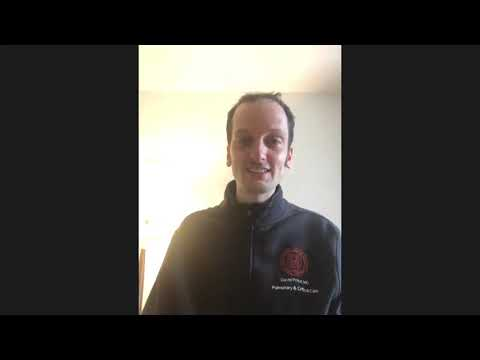

In [34]:
from IPython.display import YouTubeVideo

YouTubeVideo('f_-16m8jwI8', width=800, height=300)

# Be safe, everyone!!